In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.cluster import KMeans
from matplotlib import style
import pickle

In [2]:
df = pd.read_excel("data/cleaned_data.xlsx",index_col=[0])

In [3]:
df.head()

,BookingID_Date,Org_lat_lon,Des_lat_lon,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Planned_ETA,actual_eta
148,2020-08-26 12:03:46.000,"18.750621,73.87719","12.930429,79.931163",2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,390.500000,1,Maharashtra,Tamil Nadu,913.711784,2020-08-30 16:03:46.000,2020-08-28 12:48:07.380
149,2020-08-27 15:21:48.570,"12.8390,79.9540","12.8390,79.9540",2020-08-28 11:35:40,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,406.500000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 19:21:48.570,2020-08-28 12:13:51.543
150,2020-08-27 14:22:17.833,"12.8390,79.9540","12.8390,79.9540",2020-08-28 11:25:38,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,405.750000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 18:22:17.833,2020-08-28 11:33:19.043
151,2020-08-28 00:32:20.523,"12.8390,79.9540","12.8390,79.9540",2020-08-28 11:25:37,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,396.916667,1,Tamil Nadu,Tamil Nadu,0.000000,2020-09-01 04:32:20.523,2020-08-28 11:31:29.780
152,2020-08-26 09:55:08.000,"22.961777,72.094219","12.786517,79.975221",2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,477.250000,1,Gujarat,Tamil Nadu,1401.232229,2020-08-30 13:55:08.000,2020-08-29 07:09:41.173


In [4]:
# split column and add new columns to df
df[['Orgin_lat','Orgin_lon']] = df['Org_lat_lon'].str.split(',', expand=True)
df[['Destination_lat','Destination_lon']] = df['Des_lat_lon'].str.split(',', expand=True)

df.drop(columns=["Org_lat_lon","Des_lat_lon"], inplace=True)
# display the dataframe
df

,BookingID_Date,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Planned_ETA,actual_eta,Orgin_lat,Orgin_lon,Destination_lat,Destination_lon
148,2020-08-26 12:03:46.000,2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,390.500000,1,Maharashtra,Tamil Nadu,913.711784,2020-08-30 16:03:46.000,2020-08-28 12:48:07.380,18.750621,73.87719,12.930429,79.931163
149,2020-08-27 15:21:48.570,2020-08-28 11:35:40,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,406.500000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 19:21:48.570,2020-08-28 12:13:51.543,12.8390,79.9540,12.8390,79.9540
150,2020-08-27 14:22:17.833,2020-08-28 11:25:38,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,405.750000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 18:22:17.833,2020-08-28 11:33:19.043,12.8390,79.9540,12.8390,79.9540
151,2020-08-28 00:32:20.523,2020-08-28 11:25:37,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,396.916667,1,Tamil Nadu,Tamil Nadu,0.000000,2020-09-01 04:32:20.523,2020-08-28 11:31:29.780,12.8390,79.9540,12.8390,79.9540
152,2020-08-26 09:55:08.000,2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,477.250000,1,Gujarat,Tamil Nadu,1401.232229,2020-08-30 13:55:08.000,2020-08-29 07:09:41.173,22.961777,72.094219,12.786517,79.975221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2020-08-08 15:10:45.000,2020-08-14 13:45:10,21.067802,72.978950,2020-08-08 15:10:45,2020-08-15 02:40:21.237,1044.000000,0,Karnataka,Rajasthan,1573.480756,2020-08-09 23:53:10.000,2020-08-15 02:40:21.237,12.722686,77.676518,26.2389,73.0243
1355,2020-08-08 15:10:44.000,2020-08-14 14:25:12,12.966213,77.582370,2020-08-08 15:10:44,2020-08-15 01:04:01.580,1202.416667,0,Karnataka,Telangana,549.735797,2020-08-09 02:11:16.000,2020-08-15 01:04:01.580,12.722686,77.676518,17.603892,78.629944
1357,2020-08-06 21:25:41.000,2020-08-10 19:35:12,17.383795,78.474892,2020-08-06 21:25:41,2020-08-14 16:46:07.273,1433.333333,0,Karnataka,Telangana,511.106229,2020-08-07 08:00:32.000,2020-08-14 16:46:07.273,12.722686,77.676518,17.336504,77.904813
1363,2020-08-07 17:20:10.000,2020-08-08 08:15:08,14.688184,77.597959,2020-08-07 17:20:10,2020-08-14 02:39:34.687,1225.000000,0,Karnataka,Andhra Pradesh,160.261116,2020-08-07 21:12:17.000,2020-08-14 02:39:34.687,12.722686,77.676518,14.165574,77.807421


In [5]:
# [df.trip_end_date - df.trip_start_date].dt.hour

# df['Duration'] = df['trip_end_date'] - df['trip_start_date']
# df['Duration']=df['Duration']/np.timedelta64(1,'s')

# df

In [6]:
# a=pd.to_datetime('2015-01-24 18:00:28')

In [7]:
# b=pd.to_datetime('2015-01-24 18:10:07')

In [8]:
# (b-a)/np.timedelta64(1,'s')

In [9]:
# (df['trip_end_date'] - df['trip_start_date'])/np.timedelta64(1,'h')

In [10]:
# len(df[df['Duration']<=0]) # outliers

In [11]:
# df['speed'] = (df['Org_Dest_distance'] * 3600)//df['Duration']

In [12]:
df.head()

,BookingID_Date,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Planned_ETA,actual_eta,Orgin_lat,Orgin_lon,Destination_lat,Destination_lon
148,2020-08-26 12:03:46.000,2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,390.500000,1,Maharashtra,Tamil Nadu,913.711784,2020-08-30 16:03:46.000,2020-08-28 12:48:07.380,18.750621,73.87719,12.930429,79.931163
149,2020-08-27 15:21:48.570,2020-08-28 11:35:40,12.768090,80.026660,2020-08-27 15:21:06,2020-08-27 15:21:54.947,406.500000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 19:21:48.570,2020-08-28 12:13:51.543,12.8390,79.9540,12.8390,79.9540
150,2020-08-27 14:22:17.833,2020-08-28 11:25:38,12.835262,79.952533,2020-08-27 14:21:21,2020-08-27 14:22:25.037,405.750000,1,Tamil Nadu,Tamil Nadu,0.000000,2020-08-31 18:22:17.833,2020-08-28 11:33:19.043,12.8390,79.9540,12.8390,79.9540
151,2020-08-28 00:32:20.523,2020-08-28 11:25:37,12.839172,79.951355,2020-08-28 00:31:41,2020-08-28 00:32:24.213,396.916667,1,Tamil Nadu,Tamil Nadu,0.000000,2020-09-01 04:32:20.523,2020-08-28 11:31:29.780,12.8390,79.9540,12.8390,79.9540
152,2020-08-26 09:55:08.000,2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,477.250000,1,Gujarat,Tamil Nadu,1401.232229,2020-08-30 13:55:08.000,2020-08-29 07:09:41.173,22.961777,72.094219,12.786517,79.975221


In [13]:
# df1 = df[df['Duration'] > 0]  
# df1 = df[df['speed'] > 0]  
# df1

In [14]:
# plt.scatter(df1['Duration'], df1['Org_Dest_distance'])
# plt.title('Trip Duration VS Trip Distance')
# plt.xlabel('Trip Duration (secs)')
# plt.ylabel('Trip Distance (miles)')
# plt.show()

In [15]:
# df1.drop(columns=['BookingID_Date'], inplace=True)
# df1.drop(columns=['Planned_ETA'], inplace=True)
# df1.drop(columns=['actual_eta'], inplace=True)
# df1.drop(columns=['trip_end_date'], inplace=True)

In [16]:
# df1[df1['Duration']<500]['logistic_mode']==

In [17]:
# df1['Duration'].max()

In [18]:
# Air_Duration=df1[df1['logistic_mode']==1]['Duration']
# Air_distance = df1[df1['logistic_mode']==1]['Org_Dest_distance']

In [19]:
# truck_Duration=df1[df1['logistic_mode']==0]['Duration']
# truck_distance=df1[df1['logistic_mode']==0]['Org_Dest_distance']

In [20]:
# plt.scatter(Air_Duration, Air_distance)
# plt.title('BY Air')
# plt.xlabel('Trip Duration (secs)')
# plt.ylabel('Trip Distance (miles)')
# plt.show()

In [21]:
# plt.scatter(truck_Duration, truck_distance)
# plt.title('BY Truck')
# plt.xlabel('Trip Duration (secs)')
# plt.ylabel('Trip Distance (miles)')
# plt.show()

In [22]:

# df1['Data_Ping_time_Minutes'] = pd.to_datetime(df1['Data_Ping_time']).dt.minute
# df1['Data_Ping_time_Hrs'] = pd.to_datetime(df1['Data_Ping_time']).dt.hour
# df1['Data_Ping_time_Days'] = pd.to_datetime(df1['Data_Ping_time']).dt.day
# df1['Data_Ping_time_Weeks'] = pd.to_datetime(df1['Data_Ping_time']).dt.week
# df1['Data_Ping_time_Months'] = pd.to_datetime(df1['Data_Ping_time']).dt.month
# df1['Data_Ping_time_Years'] =  pd.to_datetime(df1['Data_Ping_time']).dt.year

In [23]:

# df1['trip_start_date_Minutes'] = pd.to_datetime(df1['trip_start_date']).dt.minute
# df1['trip_start_date_Hrs'] = pd.to_datetime(df1['trip_start_date']).dt.hour
# df1['trip_start_date_Days'] = pd.to_datetime(df1['trip_start_date']).dt.day
# df1['trip_start_date_Weeks'] = pd.to_datetime(df1['trip_start_date']).dt.week
# df1['trip_start_date_Months'] = pd.to_datetime(df1['trip_start_date']).dt.month
# df1['trip_start_date_Years'] =  pd.to_datetime(df1['trip_start_date']).dt.year

In [24]:

# df1['Minutes'] = pd.to_datetime(df1['send_timestamp']).dt.minute
# df1['Hrs'] = pd.to_datetime(df1['send_timestamp']).dt.hour
# df1['Days'] = pd.to_datetime(df1['send_timestamp']).dt.day
# df1['Weeks'] = pd.to_datetime(df1['send_timestamp']).dt.week
# df1['Months'] = pd.to_datetime(df1['send_timestamp']).dt.month
# df1['Years'] =  pd.to_datetime(df1['send_timestamp']).dt.year

In [25]:

# df1['Minutes'] = pd.to_datetime(df1['send_timestamp']).dt.minute
# df1['Hrs'] = pd.to_datetime(df1['send_timestamp']).dt.hour
# df1['Days'] = pd.to_datetime(df1['send_timestamp']).dt.day
# df1['Weeks'] = pd.to_datetime(df1['send_timestamp']).dt.week
# df1['Months'] = pd.to_datetime(df1['send_timestamp']).dt.month
# df1['Years'] =  pd.to_datetime(df1['send_timestamp']).dt.year

In [26]:

df['Data_Ping_time_Minutes'] = pd.to_datetime(df['Data_Ping_time']).dt.minute
df['Data_Ping_time_Hrs'] = pd.to_datetime(df['Data_Ping_time']).dt.hour
df['Data_Ping_time_Days'] = pd.to_datetime(df['Data_Ping_time']).dt.day
df['Data_Ping_time_Weeks'] = pd.to_datetime(df['Data_Ping_time']).dt.week
df['Data_Ping_time_Months'] = pd.to_datetime(df['Data_Ping_time']).dt.month
df['Data_Ping_time_Years'] =  pd.to_datetime(df['Data_Ping_time']).dt.year

C:\Users\ShamZee\AppData\Local\Temp\ipykernel_12124\2937087784.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Data_Ping_time_Weeks'] = pd.to_datetime(df['Data_Ping_time']).dt.week


In [27]:

df['trip_start_date_Minutes'] = pd.to_datetime(df['trip_start_date']).dt.minute
df['trip_start_date_Hrs'] = pd.to_datetime(df['trip_start_date']).dt.hour
df['trip_start_date_Days'] = pd.to_datetime(df['trip_start_date']).dt.day
df['trip_start_date_Weeks'] = pd.to_datetime(df['trip_start_date']).dt.week
df['trip_start_date_Months'] = pd.to_datetime(df['trip_start_date']).dt.month
df['trip_start_date_Years'] =  pd.to_datetime(df['trip_start_date']).dt.year

C:\Users\ShamZee\AppData\Local\Temp\ipykernel_12124\1260617708.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['trip_start_date_Weeks'] = pd.to_datetime(df['trip_start_date']).dt.week


In [28]:
x=df[df['trip_start_date_Years']==2019  ][df['Data_Ping_time_Years']==2020  ]

C:\Users\ShamZee\AppData\Local\Temp\ipykernel_12124\3985734883.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=df[df['trip_start_date_Years']==2019  ][df['Data_Ping_time_Years']==2020  ]


In [29]:
x[df['Data_Ping_time_Years']==2020  ]

C:\Users\ShamZee\AppData\Local\Temp\ipykernel_12124\1318618901.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x[df['Data_Ping_time_Years']==2020  ]


,BookingID_Date,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,...,Data_Ping_time_Days,Data_Ping_time_Weeks,Data_Ping_time_Months,Data_Ping_time_Years,trip_start_date_Minutes,trip_start_date_Hrs,trip_start_date_Days,trip_start_date_Weeks,trip_start_date_Months,trip_start_date_Years
1811,2019-10-01 13:58:04,2020-08-04 19:23:16,22.239504,84.751818,2019-10-01 13:58:04,2019-10-21 09:30:00,1272.833333,0,Odisha,Odisha,...,4,32,8,2020,58,13,1,40,10,2019
1817,2019-10-22 13:45:17,2020-08-04 18:00:07,22.222054,84.858430,2019-10-22 13:45:17,2019-10-29 15:56:00,739.416667,0,Odisha,Odisha,...,4,32,8,2020,45,13,22,43,10,2019
2223,2019-10-14 10:48:09,2020-07-24 20:30:06,21.548998,81.943596,2019-10-14 10:48:09,2019-11-04 11:23:00,899.175000,0,Chattisgarh,Jharkhand,...,24,30,7,2020,48,10,14,42,10,2019
2861,2019-10-23 19:36:06,2020-06-30 12:55:06,13.008317,77.663856,2019-10-23 19:36:06,2019-10-26 17:04:00,1125.490000,0,Karnataka,Karnataka,...,30,27,6,2020,36,19,23,43,10,2019
2862,2019-10-26 12:13:39,2020-06-30 12:55:06,13.008317,77.663856,2019-10-26 12:13:39,2019-11-04 11:23:00,1014.490000,0,Karnataka,Karnataka,...,30,27,6,2020,13,12,26,43,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,2019-10-26 17:49:06,2020-01-02 10:05:55,28.438282,77.830667,2019-10-26 17:49:06,2019-12-07 16:08:00,122.916667,0,Uttar Pradesh,Uttar Pradesh,...,2,1,1,2020,49,17,26,43,10,2019
3871,2019-11-05 17:26:25,2020-01-02 10:05:55,21.874906,73.055735,2019-11-05 17:26:25,2019-11-11 08:08:00,105.916667,0,Gujarat,Gujarat,...,2,1,1,2020,26,17,5,45,11,2019
3872,2019-11-25 17:34:02,2020-01-02 10:05:55,20.587821,86.037669,2019-11-25 17:34:02,2019-12-08 10:27:00,99.000000,0,Odisha,Odisha,...,2,1,1,2020,34,17,25,48,11,2019
3873,2019-11-28 17:50:41,2020-01-02 10:05:55,29.460500,77.731780,2019-11-28 17:50:41,2019-12-03 21:52:00,97.333333,0,Uttar Pradesh,Uttar Pradesh,...,2,1,1,2020,50,17,28,48,11,2019


In [30]:
df.drop(x[df['Data_Ping_time_Years']==2020].index, inplace=True) #outlier

C:\Users\ShamZee\AppData\Local\Temp\ipykernel_12124\2015418228.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(x[df['Data_Ping_time_Years']==2020].index, inplace=True) #outlier


In [31]:
df.shape

(5692, 29)

In [32]:
df['Duration'] = df['trip_end_date'] - df['trip_start_date']
df['Duration']=df['Duration']/np.timedelta64(1,'s')

In [33]:
len(df[df['Duration']<=0])

65

In [34]:
df['speed'] = (df['Org_Dest_distance'] * 3600)//df['Duration']

In [35]:
df1 = df[df['Duration'] > 0]  
df1 = df[df['speed'] > 0]  
df1

,BookingID_Date,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,...,Data_Ping_time_Months,Data_Ping_time_Years,trip_start_date_Minutes,trip_start_date_Hrs,trip_start_date_Days,trip_start_date_Weeks,trip_start_date_Months,trip_start_date_Years,Duration,speed
148,2020-08-26 12:03:46,2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,2020-08-28 12:15:10.000,390.500000,1,Maharashtra,Tamil Nadu,...,8,2020,16,16,26,35,8,2020,158350.000,20.0
152,2020-08-26 09:55:08,2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,2020-08-28 11:21:00.000,477.250000,1,Gujarat,Tamil Nadu,...,8,2020,35,15,26,35,8,2020,157560.000,32.0
153,2020-08-25 15:45:33,2020-08-28 11:25:18,12.764354,77.790477,2020-08-26 11:58:00,2020-08-28 11:25:18.000,564.750000,1,Tamil Nadu,Tamil Nadu,...,8,2020,58,11,26,35,8,2020,170838.000,4.0
157,2020-08-25 13:39:48,2020-08-28 10:40:27,18.697551,73.838973,2020-08-27 17:21:00,2020-08-28 10:42:00.000,501.666667,1,Tamil Nadu,Maharashtra,...,8,2020,21,17,27,35,8,2020,62460.000,53.0
158,2020-08-25 12:03:57,2020-08-28 10:25:21,12.836794,79.950705,2020-08-26 07:27:00,2020-08-28 10:25:21.000,505.750000,1,Maharashtra,Tamil Nadu,...,8,2020,27,7,26,35,8,2020,183501.000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2020-08-08 15:10:45,2020-08-14 13:45:10,21.067802,72.978950,2020-08-08 15:10:45,2020-08-15 02:40:21.237,1044.000000,0,Karnataka,Rajasthan,...,8,2020,10,15,8,32,8,2020,559776.237,10.0
1355,2020-08-08 15:10:44,2020-08-14 14:25:12,12.966213,77.582370,2020-08-08 15:10:44,2020-08-15 01:04:01.580,1202.416667,0,Karnataka,Telangana,...,8,2020,10,15,8,32,8,2020,553997.580,3.0
1357,2020-08-06 21:25:41,2020-08-10 19:35:12,17.383795,78.474892,2020-08-06 21:25:41,2020-08-14 16:46:07.273,1433.333333,0,Karnataka,Telangana,...,8,2020,25,21,6,32,8,2020,674426.273,2.0
1363,2020-08-07 17:20:10,2020-08-08 08:15:08,14.688184,77.597959,2020-08-07 17:20:10,2020-08-14 02:39:34.687,1225.000000,0,Karnataka,Andhra Pradesh,...,8,2020,20,17,7,32,8,2020,551964.687,1.0


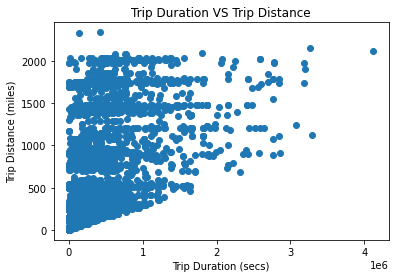

In [36]:
plt.scatter(df1['Duration'], df1['Org_Dest_distance'])
plt.title('Trip Duration VS Trip Distance')
plt.xlabel('Trip Duration (secs)')
plt.ylabel('Trip Distance (miles)')
plt.show()

In [37]:
df1.drop(columns=['BookingID_Date'], inplace=True)
df1.drop(columns=['Planned_ETA'], inplace=True)
df1.drop(columns=['actual_eta'], inplace=True)
df1.drop(columns=['trip_end_date'], inplace=True)

C:\Users\ShamZee\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
Air_Duration=df1[df1['logistic_mode']==1]['Duration']
Air_distance = df1[df1['logistic_mode']==1]['Org_Dest_distance']

In [39]:
truck_Duration=df1[df1['logistic_mode']==0]['Duration']
truck_distance=df1[df1['logistic_mode']==0]['Org_Dest_distance']

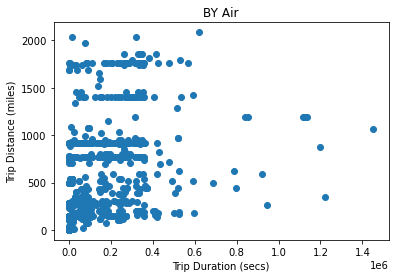

In [40]:
plt.scatter(Air_Duration, Air_distance)
plt.title('BY Air')
plt.xlabel('Trip Duration (secs)')
plt.ylabel('Trip Distance (miles)')
plt.show()

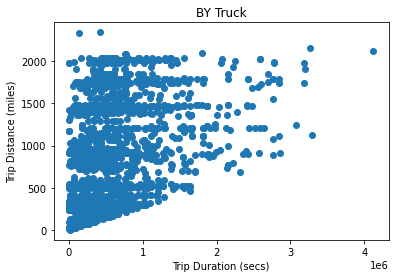

In [41]:
plt.scatter(truck_Duration, truck_distance)
plt.title('BY Truck')
plt.xlabel('Trip Duration (secs)')
plt.ylabel('Trip Distance (miles)')
plt.show()

In [42]:
df1[df1['Duration']<1000]

,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Orgin_lat,...,Data_Ping_time_Months,Data_Ping_time_Years,trip_start_date_Minutes,trip_start_date_Hrs,trip_start_date_Days,trip_start_date_Weeks,trip_start_date_Months,trip_start_date_Years,Duration,speed
159,2020-08-26 11:10:16,12.714820,77.870760,2020-08-26 11:17:49,349.083333,1,Tamil Nadu,Karnataka,279.360528,13.2150,...,8,2020,17,11,26,35,8,2020,50.910,19754.0
160,2020-08-26 15:10:15,12.716235,77.875626,2020-08-26 11:33:10,317.416667,1,Tamil Nadu,Karnataka,279.360528,13.2150,...,8,2020,33,11,26,35,8,2020,164.353,6119.0
161,2020-08-28 06:00:09,12.776642,78.709050,2020-08-26 17:04:52,298.916667,1,Tamil Nadu,Karnataka,279.360528,13.2150,...,8,2020,4,17,26,35,8,2020,100.503,10006.0
164,2020-08-28 09:35:26,12.783234,80.014380,2020-08-27 09:26:00,464.500000,1,Tamil Nadu,Tamil Nadu,0.110629,12.7770,...,8,2020,26,9,27,35,8,2020,59.853,6.0
165,2020-08-28 09:35:27,12.778493,80.025138,2020-08-27 09:26:00,371.583333,1,Tamil Nadu,Tamil Nadu,0.110629,12.7770,...,8,2020,26,9,27,35,8,2020,77.793,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,2019-06-15 11:40:12,13.000688,77.609617,2019-06-01 11:27:00,36.983333,1,Karnataka,Karnataka,19.744015,13.007503209603689,...,6,2019,27,11,1,22,6,2019,600.000,118.0
5887,2019-06-15 11:40:12,12.359047,76.636158,2019-03-23 09:02:24,87.166667,1,Karnataka,Karnataka,24.800983,12.992699792116747,...,6,2019,2,9,23,12,3,2019,840.000,106.0
5891,2019-06-15 11:40:12,13.025081,77.723115,2019-03-23 09:48:00,134.333333,1,Karnataka,Karnataka,24.800983,12.992699792116747,...,6,2019,48,9,23,12,3,2019,840.000,106.0
5894,2019-06-15 11:40:12,13.024894,77.722614,2019-03-25 10:54:00,44.000000,1,Karnataka,Karnataka,24.800983,12.992699792116747,...,6,2019,54,10,25,13,3,2019,840.000,106.0


In [43]:
len(df1[df1['logistic_mode']==1])

1019

In [44]:
len(df1[df1['logistic_mode']==0])

2860

In [45]:
df2 = df1[df1['Duration']>1000] # Duration Outliers

In [46]:
df2

,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Orgin_lat,...,Data_Ping_time_Months,Data_Ping_time_Years,trip_start_date_Minutes,trip_start_date_Hrs,trip_start_date_Days,trip_start_date_Weeks,trip_start_date_Months,trip_start_date_Years,Duration,speed
148,2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,390.500000,1,Maharashtra,Tamil Nadu,913.711784,18.750621,...,8,2020,16,16,26,35,8,2020,158350.000,20.0
152,2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,477.250000,1,Gujarat,Tamil Nadu,1401.232229,22.961777,...,8,2020,35,15,26,35,8,2020,157560.000,32.0
153,2020-08-28 11:25:18,12.764354,77.790477,2020-08-26 11:58:00,564.750000,1,Tamil Nadu,Tamil Nadu,200.722269,11.154594,...,8,2020,58,11,26,35,8,2020,170838.000,4.0
157,2020-08-28 10:40:27,18.697551,73.838973,2020-08-27 17:21:00,501.666667,1,Tamil Nadu,Maharashtra,921.081141,13.087428,...,8,2020,21,17,27,35,8,2020,62460.000,53.0
158,2020-08-28 10:25:21,12.836794,79.950705,2020-08-26 07:27:00,505.750000,1,Maharashtra,Tamil Nadu,913.711784,18.750621,...,8,2020,27,7,26,35,8,2020,183501.000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2020-08-14 13:45:10,21.067802,72.978950,2020-08-08 15:10:45,1044.000000,0,Karnataka,Rajasthan,1573.480756,12.722686,...,8,2020,10,15,8,32,8,2020,559776.237,10.0
1355,2020-08-14 14:25:12,12.966213,77.582370,2020-08-08 15:10:44,1202.416667,0,Karnataka,Telangana,549.735797,12.722686,...,8,2020,10,15,8,32,8,2020,553997.580,3.0
1357,2020-08-10 19:35:12,17.383795,78.474892,2020-08-06 21:25:41,1433.333333,0,Karnataka,Telangana,511.106229,12.722686,...,8,2020,25,21,6,32,8,2020,674426.273,2.0
1363,2020-08-08 08:15:08,14.688184,77.597959,2020-08-07 17:20:10,1225.000000,0,Karnataka,Andhra Pradesh,160.261116,12.722686,...,8,2020,20,17,7,32,8,2020,551964.687,1.0


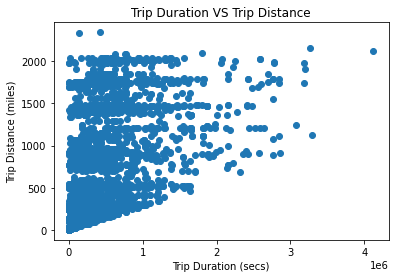

In [47]:
plt.scatter(df2['Duration'], df2['Org_Dest_distance'])
plt.title('Trip Duration VS Trip Distance')
plt.xlabel('Trip Duration (secs)')
plt.ylabel('Trip Distance (miles)')
plt.show()

In [48]:
df2['Duration'].min()

1003.0

In [49]:
df2['Org_Dest_distance'].min()

2.648439103620131

In [50]:
df2

,Data_Ping_time,Curr_lat,Curr_lon,trip_start_date,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Orgin_lat,...,Data_Ping_time_Months,Data_Ping_time_Years,trip_start_date_Minutes,trip_start_date_Hrs,trip_start_date_Days,trip_start_date_Weeks,trip_start_date_Months,trip_start_date_Years,Duration,speed
148,2020-08-28 12:15:10,12.837127,79.951866,2020-08-26 16:16:00,390.500000,1,Maharashtra,Tamil Nadu,913.711784,18.750621,...,8,2020,16,16,26,35,8,2020,158350.000,20.0
152,2020-08-28 08:35:08,18.996400,75.740200,2020-08-26 15:35:00,477.250000,1,Gujarat,Tamil Nadu,1401.232229,22.961777,...,8,2020,35,15,26,35,8,2020,157560.000,32.0
153,2020-08-28 11:25:18,12.764354,77.790477,2020-08-26 11:58:00,564.750000,1,Tamil Nadu,Tamil Nadu,200.722269,11.154594,...,8,2020,58,11,26,35,8,2020,170838.000,4.0
157,2020-08-28 10:40:27,18.697551,73.838973,2020-08-27 17:21:00,501.666667,1,Tamil Nadu,Maharashtra,921.081141,13.087428,...,8,2020,21,17,27,35,8,2020,62460.000,53.0
158,2020-08-28 10:25:21,12.836794,79.950705,2020-08-26 07:27:00,505.750000,1,Maharashtra,Tamil Nadu,913.711784,18.750621,...,8,2020,27,7,26,35,8,2020,183501.000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2020-08-14 13:45:10,21.067802,72.978950,2020-08-08 15:10:45,1044.000000,0,Karnataka,Rajasthan,1573.480756,12.722686,...,8,2020,10,15,8,32,8,2020,559776.237,10.0
1355,2020-08-14 14:25:12,12.966213,77.582370,2020-08-08 15:10:44,1202.416667,0,Karnataka,Telangana,549.735797,12.722686,...,8,2020,10,15,8,32,8,2020,553997.580,3.0
1357,2020-08-10 19:35:12,17.383795,78.474892,2020-08-06 21:25:41,1433.333333,0,Karnataka,Telangana,511.106229,12.722686,...,8,2020,25,21,6,32,8,2020,674426.273,2.0
1363,2020-08-08 08:15:08,14.688184,77.597959,2020-08-07 17:20:10,1225.000000,0,Karnataka,Andhra Pradesh,160.261116,12.722686,...,8,2020,20,17,7,32,8,2020,551964.687,1.0


In [51]:

df2.drop(columns=['Data_Ping_time'], inplace=True)

df2.drop(columns=['trip_start_date'], inplace=True)


C:\Users\ShamZee\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 148 to 1369
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Curr_lat                       3619 non-null   float64
 1   Curr_lon                       3619 non-null   float64
 2   TRANSPORTATION_DISTANCE_IN_KM  3619 non-null   float64
 3   logistic_mode                  3619 non-null   int64  
 4   Origin_states                  3619 non-null   object 
 5   Dest_states                    3619 non-null   object 
 6   Org_Dest_distance              3619 non-null   float64
 7   Orgin_lat                      3619 non-null   object 
 8   Orgin_lon                      3619 non-null   object 
 9   Destination_lat                3619 non-null   object 
 10  Destination_lon                3619 non-null   object 
 11  Data_Ping_time_Minutes         3619 non-null   int64  
 12  Data_Ping_time_Hrs             3619 non-null  

In [53]:
df2["Orgin_lat"] = df2["Orgin_lat"].astype(float)
df2["Orgin_lon"] = df2["Orgin_lon"].astype(float)
df2["Destination_lat"] = df2["Destination_lat"].astype(float)
df2["Destination_lon"] = df2["Destination_lon"].astype(float)

C:\Users\ShamZee\AppData\Local\Temp\ipykernel_12124\747094260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Orgin_lat"] = df2["Orgin_lat"].astype(float)
C:\Users\ShamZee\AppData\Local\Temp\ipykernel_12124\747094260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Orgin_lon"] = df2["Orgin_lon"].astype(float)
C:\Users\ShamZee\AppData\Local\Temp\ipykernel_12124\747094260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 148 to 1369
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Curr_lat                       3619 non-null   float64
 1   Curr_lon                       3619 non-null   float64
 2   TRANSPORTATION_DISTANCE_IN_KM  3619 non-null   float64
 3   logistic_mode                  3619 non-null   int64  
 4   Origin_states                  3619 non-null   object 
 5   Dest_states                    3619 non-null   object 
 6   Org_Dest_distance              3619 non-null   float64
 7   Orgin_lat                      3619 non-null   float64
 8   Orgin_lon                      3619 non-null   float64
 9   Destination_lat                3619 non-null   float64
 10  Destination_lon                3619 non-null   float64
 11  Data_Ping_time_Minutes         3619 non-null   int64  
 12  Data_Ping_time_Hrs             3619 non-null  

In [55]:
df2

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Orgin_lat,Orgin_lon,Destination_lat,...,Data_Ping_time_Months,Data_Ping_time_Years,trip_start_date_Minutes,trip_start_date_Hrs,trip_start_date_Days,trip_start_date_Weeks,trip_start_date_Months,trip_start_date_Years,Duration,speed
148,12.837127,79.951866,390.500000,1,Maharashtra,Tamil Nadu,913.711784,18.750621,73.877190,12.930429,...,8,2020,16,16,26,35,8,2020,158350.000,20.0
152,18.996400,75.740200,477.250000,1,Gujarat,Tamil Nadu,1401.232229,22.961777,72.094219,12.786517,...,8,2020,35,15,26,35,8,2020,157560.000,32.0
153,12.764354,77.790477,564.750000,1,Tamil Nadu,Tamil Nadu,200.722269,11.154594,76.922532,12.746894,...,8,2020,58,11,26,35,8,2020,170838.000,4.0
157,18.697551,73.838973,501.666667,1,Tamil Nadu,Maharashtra,921.081141,13.087428,80.184717,18.750621,...,8,2020,21,17,27,35,8,2020,62460.000,53.0
158,12.836794,79.950705,505.750000,1,Maharashtra,Tamil Nadu,913.711784,18.750621,73.877190,12.930429,...,8,2020,27,7,26,35,8,2020,183501.000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,21.067802,72.978950,1044.000000,0,Karnataka,Rajasthan,1573.480756,12.722686,77.676518,26.238900,...,8,2020,10,15,8,32,8,2020,559776.237,10.0
1355,12.966213,77.582370,1202.416667,0,Karnataka,Telangana,549.735797,12.722686,77.676518,17.603892,...,8,2020,10,15,8,32,8,2020,553997.580,3.0
1357,17.383795,78.474892,1433.333333,0,Karnataka,Telangana,511.106229,12.722686,77.676518,17.336504,...,8,2020,25,21,6,32,8,2020,674426.273,2.0
1363,14.688184,77.597959,1225.000000,0,Karnataka,Andhra Pradesh,160.261116,12.722686,77.676518,14.165574,...,8,2020,20,17,7,32,8,2020,551964.687,1.0


In [56]:
df2.corr()

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Org_Dest_distance,Orgin_lat,Orgin_lon,Destination_lat,Destination_lon,Data_Ping_time_Minutes,...,Data_Ping_time_Months,Data_Ping_time_Years,trip_start_date_Minutes,trip_start_date_Hrs,trip_start_date_Days,trip_start_date_Weeks,trip_start_date_Months,trip_start_date_Years,Duration,speed
Curr_lat,1.000000,-0.029270,0.041114,-0.162346,0.328761,0.318625,0.306532,0.817327,0.035619,-0.039573,...,0.031194,0.006743,0.014446,0.050026,0.001906,0.000828,0.010091,0.006743,0.169082,0.010421
Curr_lon,-0.029270,1.000000,-0.106555,0.076151,-0.215730,0.205269,0.354551,0.003775,0.887417,-0.017251,...,-0.188511,0.056591,-0.012720,0.063503,0.076326,-0.185013,-0.196195,0.056591,-0.088390,-0.030386
TRANSPORTATION_DISTANCE_IN_KM,0.041114,-0.106555,1.000000,0.092168,0.482857,-0.092419,-0.463142,0.117936,-0.097833,-0.071124,...,-0.231160,0.707606,0.022279,-0.191014,-0.097410,-0.200762,-0.210606,0.707606,0.107426,-0.003844
logistic_mode,-0.162346,0.076151,0.092168,1.000000,-0.210150,0.007968,-0.067437,-0.174831,0.074084,-0.006850,...,-0.107204,0.225538,0.034945,-0.102506,0.114553,-0.060658,-0.082467,0.225538,-0.331768,0.073829
Org_Dest_distance,0.328761,-0.215730,0.482857,-0.210150,1.000000,0.074990,-0.103772,0.415023,-0.194223,-0.043804,...,0.020600,0.267996,0.019732,-0.088534,-0.041136,0.008690,0.017384,0.267996,0.354242,0.046144
Orgin_lat,0.318625,0.205269,-0.092419,0.007968,0.074990,1.000000,0.181604,0.111287,0.288787,-0.016835,...,0.007846,-0.037936,0.015403,-0.151089,0.048588,-0.009132,-0.004294,-0.037936,-0.083230,-0.008196
Orgin_lon,0.306532,0.354551,-0.463142,-0.067437,-0.103772,0.181604,1.000000,0.329149,0.275680,0.008990,...,0.091254,-0.362834,-0.002649,0.249317,0.120153,0.033689,0.045424,-0.362834,0.045772,-0.007167
Destination_lat,0.817327,0.003775,0.117936,-0.174831,0.415023,0.111287,0.329149,1.000000,-0.030179,-0.039283,...,-0.000607,0.074275,0.014386,0.073027,-0.018778,-0.029854,-0.020280,0.074275,0.263465,0.016738
Destination_lon,0.035619,0.887417,-0.097833,0.074084,-0.194223,0.288787,0.275680,-0.030179,1.000000,-0.023913,...,-0.189588,0.064670,-0.021303,0.022640,0.077596,-0.190452,-0.202159,0.064670,-0.087120,-0.024912
Data_Ping_time_Minutes,-0.039573,-0.017251,-0.071124,-0.006850,-0.043804,-0.016835,0.008990,-0.039283,-0.023913,1.000000,...,0.002428,-0.051549,-0.008299,0.000210,0.052897,-0.003899,-0.014671,-0.051549,-0.034669,0.017468


In [57]:
df2['Orgin_lat'].min()

9.159925

In [58]:
df2['Orgin_lon'].min()

72.077925

In [59]:
df2['Destination_lat'].min()

8.172701

In [60]:
df2['Destination_lon'].min()

70.740636

In [61]:
# from haversine import haversine
# df2['distance'] = df2.apply(lambda row: 
#                                       haversine((row['Orgin_lat'], 
#                                                 row['Orgin_lon']), 
#                                                 (row['Destination_lat'], 
#                                                 row['Destination_lon']), unit='km'), axis=1)

In [62]:
df2

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Origin_states,Dest_states,Org_Dest_distance,Orgin_lat,Orgin_lon,Destination_lat,...,Data_Ping_time_Months,Data_Ping_time_Years,trip_start_date_Minutes,trip_start_date_Hrs,trip_start_date_Days,trip_start_date_Weeks,trip_start_date_Months,trip_start_date_Years,Duration,speed
148,12.837127,79.951866,390.500000,1,Maharashtra,Tamil Nadu,913.711784,18.750621,73.877190,12.930429,...,8,2020,16,16,26,35,8,2020,158350.000,20.0
152,18.996400,75.740200,477.250000,1,Gujarat,Tamil Nadu,1401.232229,22.961777,72.094219,12.786517,...,8,2020,35,15,26,35,8,2020,157560.000,32.0
153,12.764354,77.790477,564.750000,1,Tamil Nadu,Tamil Nadu,200.722269,11.154594,76.922532,12.746894,...,8,2020,58,11,26,35,8,2020,170838.000,4.0
157,18.697551,73.838973,501.666667,1,Tamil Nadu,Maharashtra,921.081141,13.087428,80.184717,18.750621,...,8,2020,21,17,27,35,8,2020,62460.000,53.0
158,12.836794,79.950705,505.750000,1,Maharashtra,Tamil Nadu,913.711784,18.750621,73.877190,12.930429,...,8,2020,27,7,26,35,8,2020,183501.000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,21.067802,72.978950,1044.000000,0,Karnataka,Rajasthan,1573.480756,12.722686,77.676518,26.238900,...,8,2020,10,15,8,32,8,2020,559776.237,10.0
1355,12.966213,77.582370,1202.416667,0,Karnataka,Telangana,549.735797,12.722686,77.676518,17.603892,...,8,2020,10,15,8,32,8,2020,553997.580,3.0
1357,17.383795,78.474892,1433.333333,0,Karnataka,Telangana,511.106229,12.722686,77.676518,17.336504,...,8,2020,25,21,6,32,8,2020,674426.273,2.0
1363,14.688184,77.597959,1225.000000,0,Karnataka,Andhra Pradesh,160.261116,12.722686,77.676518,14.165574,...,8,2020,20,17,7,32,8,2020,551964.687,1.0


In [72]:
Q1 = np.percentile(df2['Duration'], 25) 
Q3 = np.percentile(df2['Duration'], 75)
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR 
outlier_list_idx = df2[df2['Duration'] > Q3 + outlier_step].index
len(outlier_list_idx)

223

In [64]:
# df2.drop(outlier_list_idx, axis = 0, inplace = True)

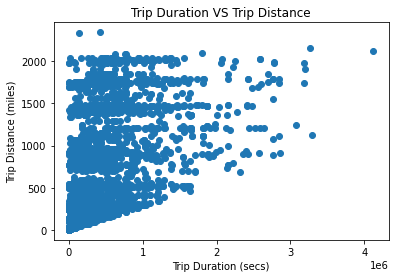

In [65]:
plt.scatter(df2['Duration'], df2['Org_Dest_distance'])
plt.title('Trip Duration VS Trip Distance')
plt.xlabel('Trip Duration (secs)')
plt.ylabel('Trip Distance (miles)')
plt.show()

In [66]:
len(df2['Origin_states'].value_counts())

19

In [67]:
len(df2['Dest_states'].value_counts())

30

In [68]:
# e = LabelEncoder()
# df2['Origin_states'] = e.fit_transform(train['store_and_fwd_flag'])
# df2['Dest_states'] = e.transform(test['store_and_fwd_flag'])

In [69]:
df2.columns

Index(['Curr_lat', 'Curr_lon', 'TRANSPORTATION_DISTANCE_IN_KM',
       'logistic_mode', 'Origin_states', 'Dest_states', 'Org_Dest_distance',
       'Orgin_lat', 'Orgin_lon', 'Destination_lat', 'Destination_lon',
       'Data_Ping_time_Minutes', 'Data_Ping_time_Hrs', 'Data_Ping_time_Days',
       'Data_Ping_time_Weeks', 'Data_Ping_time_Months', 'Data_Ping_time_Years',
       'trip_start_date_Minutes', 'trip_start_date_Hrs',
       'trip_start_date_Days', 'trip_start_date_Weeks',
       'trip_start_date_Months', 'trip_start_date_Years', 'Duration', 'speed'],
      dtype='object')

<AxesSubplot:>

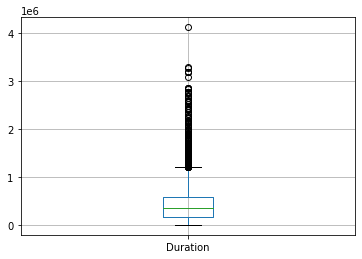

In [73]:

df2.boxplot(column=['Duration'])  

In [71]:
Q1 = np.percentile(df2['Destination_lon'], 25) 
Q3 = np.percentile(df2['Destination_lon'], 75)
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR 
outlier_list_idx = df2[df2['Destination_lon'] > Q3 + outlier_step].index
len(outlier_list_idx)

392

In [74]:
df2.drop(columns=['Origin_states', 'Dest_states'], inplace=True)

C:\Users\ShamZee\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
df2

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,logistic_mode,Org_Dest_distance,Orgin_lat,Orgin_lon,Destination_lat,Destination_lon,Data_Ping_time_Minutes,...,Data_Ping_time_Months,Data_Ping_time_Years,trip_start_date_Minutes,trip_start_date_Hrs,trip_start_date_Days,trip_start_date_Weeks,trip_start_date_Months,trip_start_date_Years,Duration,speed
148,12.837127,79.951866,390.500000,1,913.711784,18.750621,73.877190,12.930429,79.931163,15,...,8,2020,16,16,26,35,8,2020,158350.000,20.0
152,18.996400,75.740200,477.250000,1,1401.232229,22.961777,72.094219,12.786517,79.975221,35,...,8,2020,35,15,26,35,8,2020,157560.000,32.0
153,12.764354,77.790477,564.750000,1,200.722269,11.154594,76.922532,12.746894,77.806168,25,...,8,2020,58,11,26,35,8,2020,170838.000,4.0
157,18.697551,73.838973,501.666667,1,921.081141,13.087428,80.184717,18.750621,73.877190,40,...,8,2020,21,17,27,35,8,2020,62460.000,53.0
158,12.836794,79.950705,505.750000,1,913.711784,18.750621,73.877190,12.930429,79.931163,25,...,8,2020,27,7,26,35,8,2020,183501.000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,21.067802,72.978950,1044.000000,0,1573.480756,12.722686,77.676518,26.238900,73.024300,45,...,8,2020,10,15,8,32,8,2020,559776.237,10.0
1355,12.966213,77.582370,1202.416667,0,549.735797,12.722686,77.676518,17.603892,78.629944,25,...,8,2020,10,15,8,32,8,2020,553997.580,3.0
1357,17.383795,78.474892,1433.333333,0,511.106229,12.722686,77.676518,17.336504,77.904813,35,...,8,2020,25,21,6,32,8,2020,674426.273,2.0
1363,14.688184,77.597959,1225.000000,0,160.261116,12.722686,77.676518,14.165574,77.807421,15,...,8,2020,20,17,7,32,8,2020,551964.687,1.0


## X&Y

In [107]:
x = df2.drop(columns = ['Duration'])#.values.astype(float)
y = df2.iloc[:,21]#.values.astype(float)
 

In [108]:
from sklearn.model_selection import train_test_split


In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [117]:
from sklearn.svm import SVR
svr = SVR(C= 30.0, epsilon= 1, gamma= 0.009, kernel= 'rbf')

In [118]:
svr.fit(X_train,y_train)

SVR(C=30.0, epsilon=1, gamma=0.009)

In [119]:
y_pred = svr.predict(X_test)

In [120]:
y_pred

array([355507.48956253, 355816.67746356, 356055.39331598, ...,
       355577.1235384 , 356430.81168606, 355752.68835066])

In [121]:
y_test

3638    1188214.000
3161     349185.000
3880    1209807.000
4991     585684.000
5092     835360.000
           ...     
4915      38504.000
2505    1127455.000
3153      94420.000
121      330070.563
5645     680862.000
Name: Duration, Length: 1195, dtype: float64

C:\Users\ShamZee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

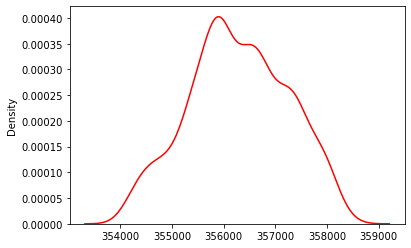

In [124]:
import seaborn as sns
# sns.distplot(y_test,hist=False,color='b')
sns.distplot(y_pred,hist=False,color='r')

In [126]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred)*100)


-5.206603550285549


In [128]:
df2.columns

Index(['Curr_lat', 'Curr_lon', 'TRANSPORTATION_DISTANCE_IN_KM',
       'logistic_mode', 'Org_Dest_distance', 'Orgin_lat', 'Orgin_lon',
       'Destination_lat', 'Destination_lon', 'Data_Ping_time_Minutes',
       'Data_Ping_time_Hrs', 'Data_Ping_time_Days', 'Data_Ping_time_Weeks',
       'Data_Ping_time_Months', 'Data_Ping_time_Years',
       'trip_start_date_Minutes', 'trip_start_date_Hrs',
       'trip_start_date_Days', 'trip_start_date_Weeks',
       'trip_start_date_Months', 'trip_start_date_Years', 'Duration', 'speed'],
      dtype='object')

In [127]:
# =----------------------------------------------------------
# =============================================================
# -----------------------------------------------------------

ValueError: num must be 1 <= num <= 20, not 21

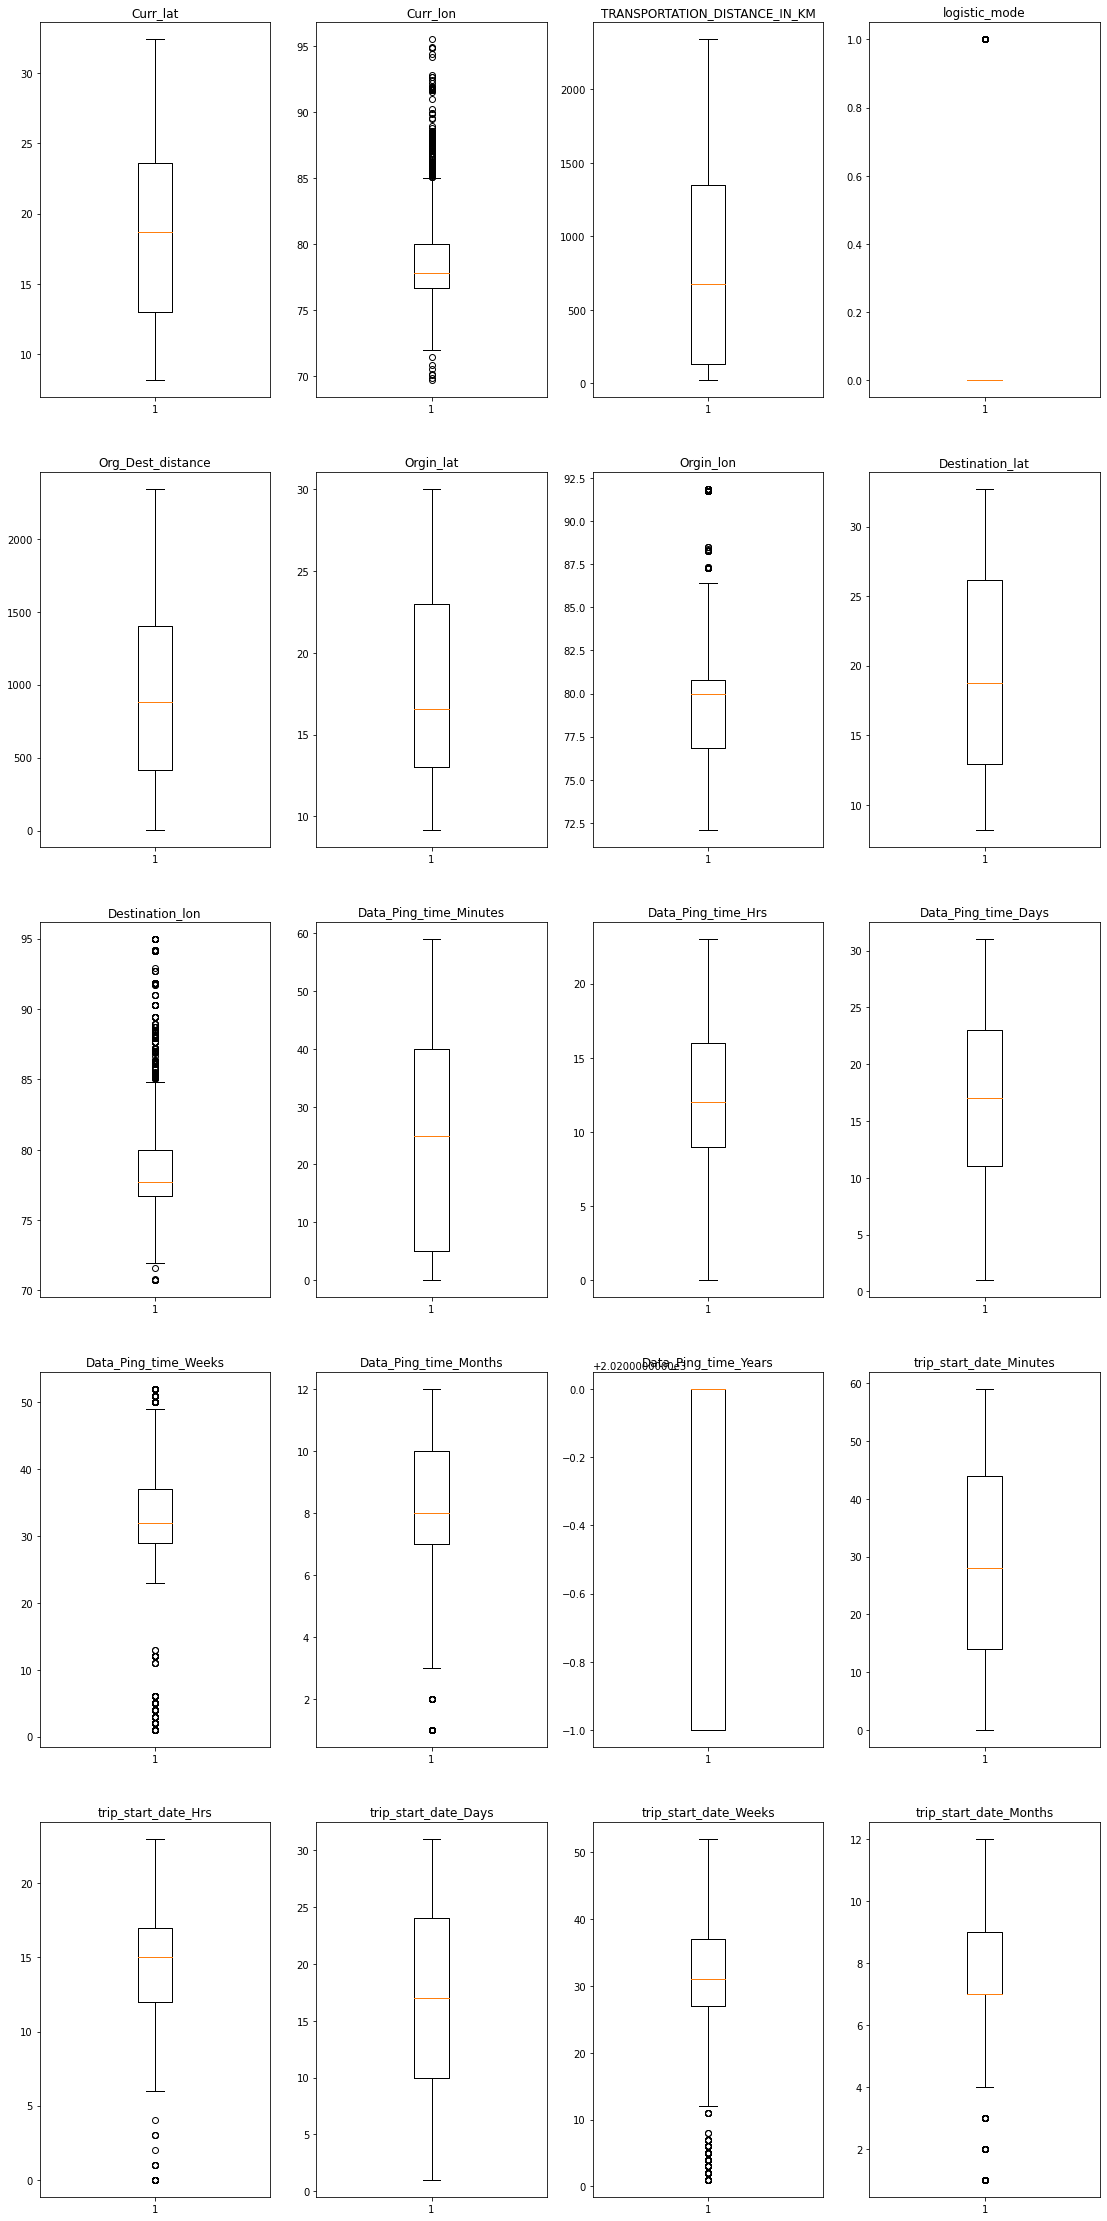

In [131]:
#checking for outliers
num_cols = {'Curr_lat':1, 'Curr_lon':2, 'TRANSPORTATION_DISTANCE_IN_KM':3,
       'logistic_mode':4, 'Org_Dest_distance':5, 'Orgin_lat':6, 'Orgin_lon':7,
       'Destination_lat':8, 'Destination_lon':9, 'Data_Ping_time_Minutes':10,
       'Data_Ping_time_Hrs':11, 'Data_Ping_time_Days':12, 'Data_Ping_time_Weeks':13,
       'Data_Ping_time_Months':14, 'Data_Ping_time_Years':15,
       'trip_start_date_Minutes':16, 'trip_start_date_Hrs':17,
       'trip_start_date_Days':18, 'trip_start_date_Weeks':19,
       'trip_start_date_Months':20, 'trip_start_date_Years':21, 'Duration':22, 'speed':23}
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in num_cols.items():
    plt.subplot(5,4,i)
    plt.boxplot(df2[variable])
    plt.title(variable)

plt.show()